In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('customers_dataset.csv')

In [6]:
data.columns = ['custid', 'gender', 'age', 'annual_income', 'spending_score']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   custid          200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
data.tail()

,custid,gender,age,annual_income,spending_score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


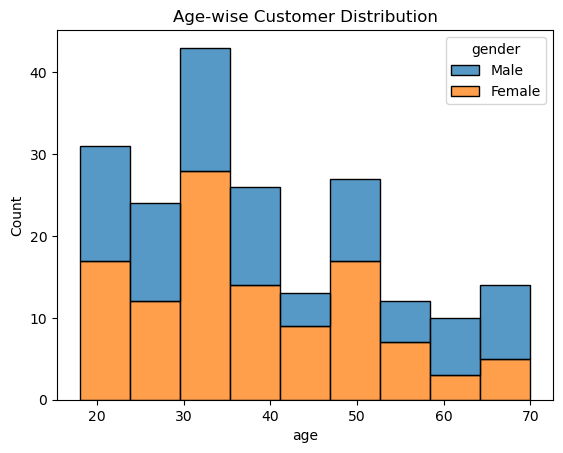

In [14]:
sns.histplot(data=data, x='age', hue='gender', multiple = 'stack')
plt.title("Age-wise Customer Distribution")
plt.show()

<Axes: xlabel='age'>

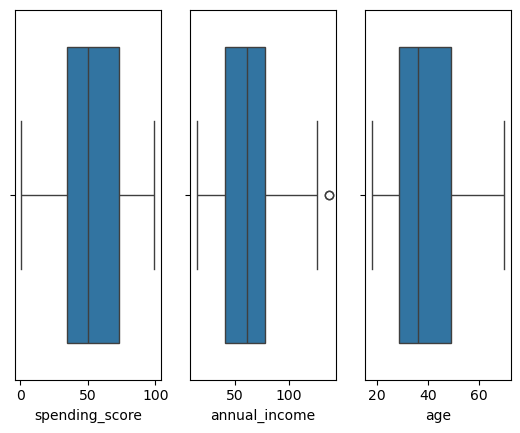

In [16]:
plt.subplot(1,3,1)
sns.boxplot(data=data, x='spending_score')
plt.subplot(1,3,2) 
sns.boxplot(data=data, x='annual_income')
plt.subplot(1,3,3)
sns.boxplot(data=data, x='age')

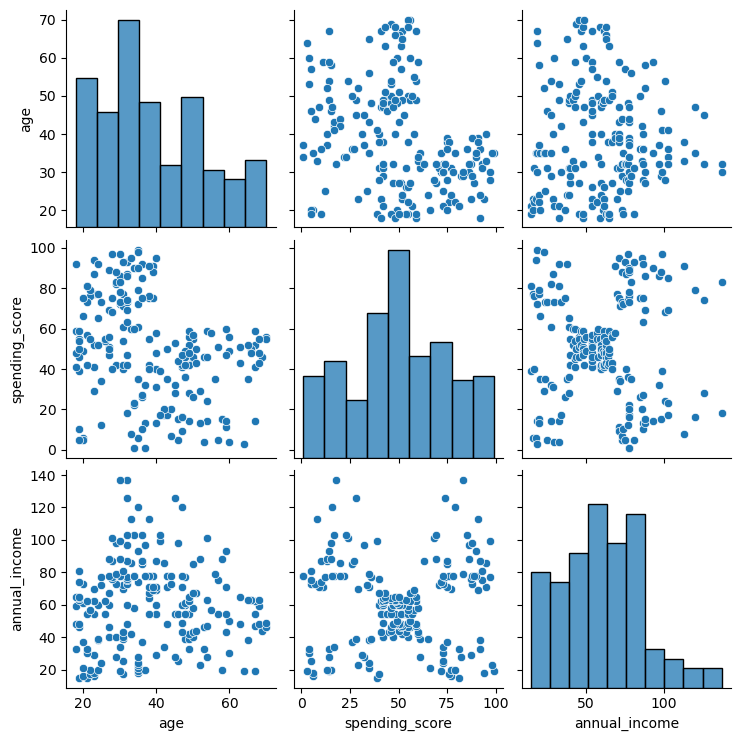

In [18]:
numerical_col = ['age', 'spending_score', 'annual_income']
sns.pairplot(data[numerical_col])

1. all the 3 numerical columns are skewed from normal distribution, age and annual income being left skewed...
2. Clear clusters visible for spending vs annual income scatterplot

In [43]:
data.head()

,gender,age,annual_income,spending_score
custid,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [57]:
num_cols = data.select_dtypes("int")

In [59]:
num_cols

,age,annual_income,spending_score
custid,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
196,35,120,79
197,45,126,28
198,32,126,74


In [63]:
num_cols.skew()

age               0.485569
annual_income     0.321843
spending_score   -0.047220
dtype: float64

**graphs with skewness between -0.5 to 0.5 are considered almost symmetrical...**

In [73]:
log_transform = lambda x : np.log1p(x)

data['age_log'] = data['age'].apply(log_transform)

<Axes: xlabel='age_log', ylabel='Count'>

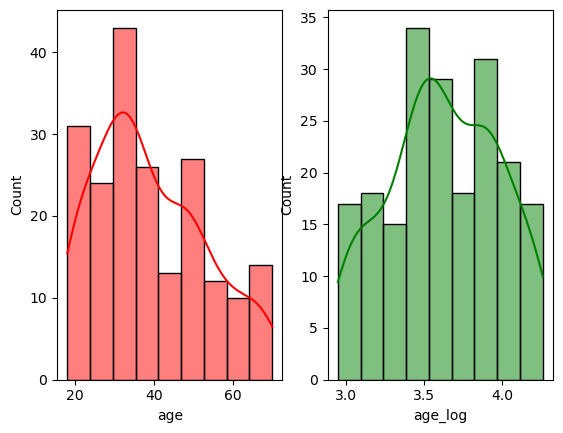

In [79]:
plt.subplot(1,2,1)
sns.histplot(data.age, kde = True, color = 'red')
plt.subplot(1,2,2)
sns.histplot(data.age_log, kde = True, color = 'green')

In [83]:
sqrt_transform = lambda x: np.sqrt(x)
data['annual_income_sqrt'] = data.annual_income.apply(sqrt_transform)
print(f"Old skewness in Annual Income: {data.annual_income.skew()}")
print(f"New skewness in Annual Income: {data.annual_income_sqrt.skew()}")

Old skewness in Annual Income: 0.3218425498619055
New skewness in Annual Income: -0.23028952579486217


<Axes: xlabel='annual_income_sqrt', ylabel='Count'>

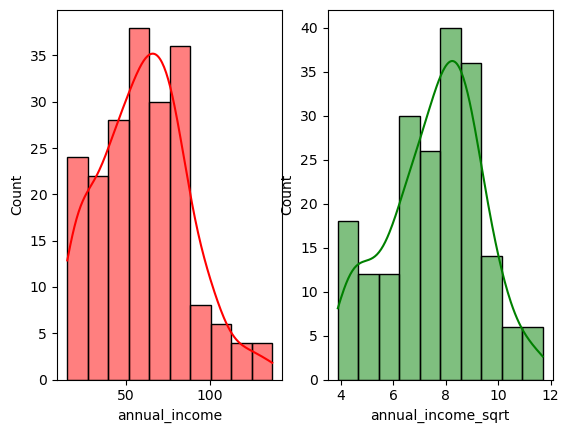

In [85]:
plt.subplot(1,2,1)
sns.histplot(data.annual_income, kde = True, color = 'red')
plt.subplot(1,2,2)
sns.histplot(data.annual_income_sqrt, kde = True, color = 'green')

In [113]:
from scipy.stats import skew
from sklearn.preprocessing import power_transform

data['annual_income_boxcox'] = power_transform(data[['annual_income']], method = 'box-cox')

print(f"Old skewness in Annual Income: {data.annual_income.skew()}")
print(f"New skewness in Annual Income: {skew(box)}")

Old skewness in Annual Income: 0.3218425498619055
New skewness in Annual Income: [-0.0659024]


<Axes: ylabel='Count'>

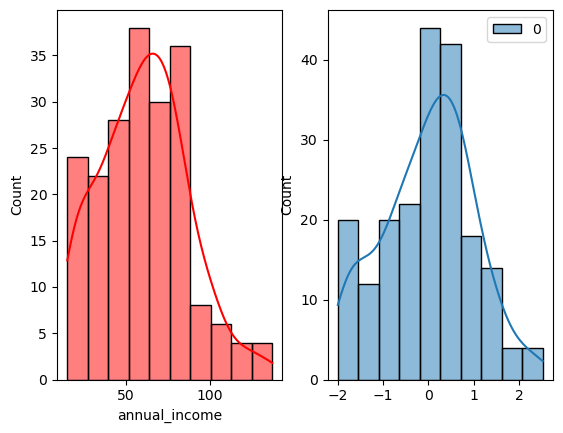

In [115]:
plt.subplot(1,2,1)
sns.histplot(data.annual_income, kde = True, color = 'red')
plt.subplot(1,2,2)
sns.histplot(box, kde = True, color = 'green')


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (200). n_quantiles is set to n_samples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (200). n_quantiles is set to n_samples.
  warnings.warn(


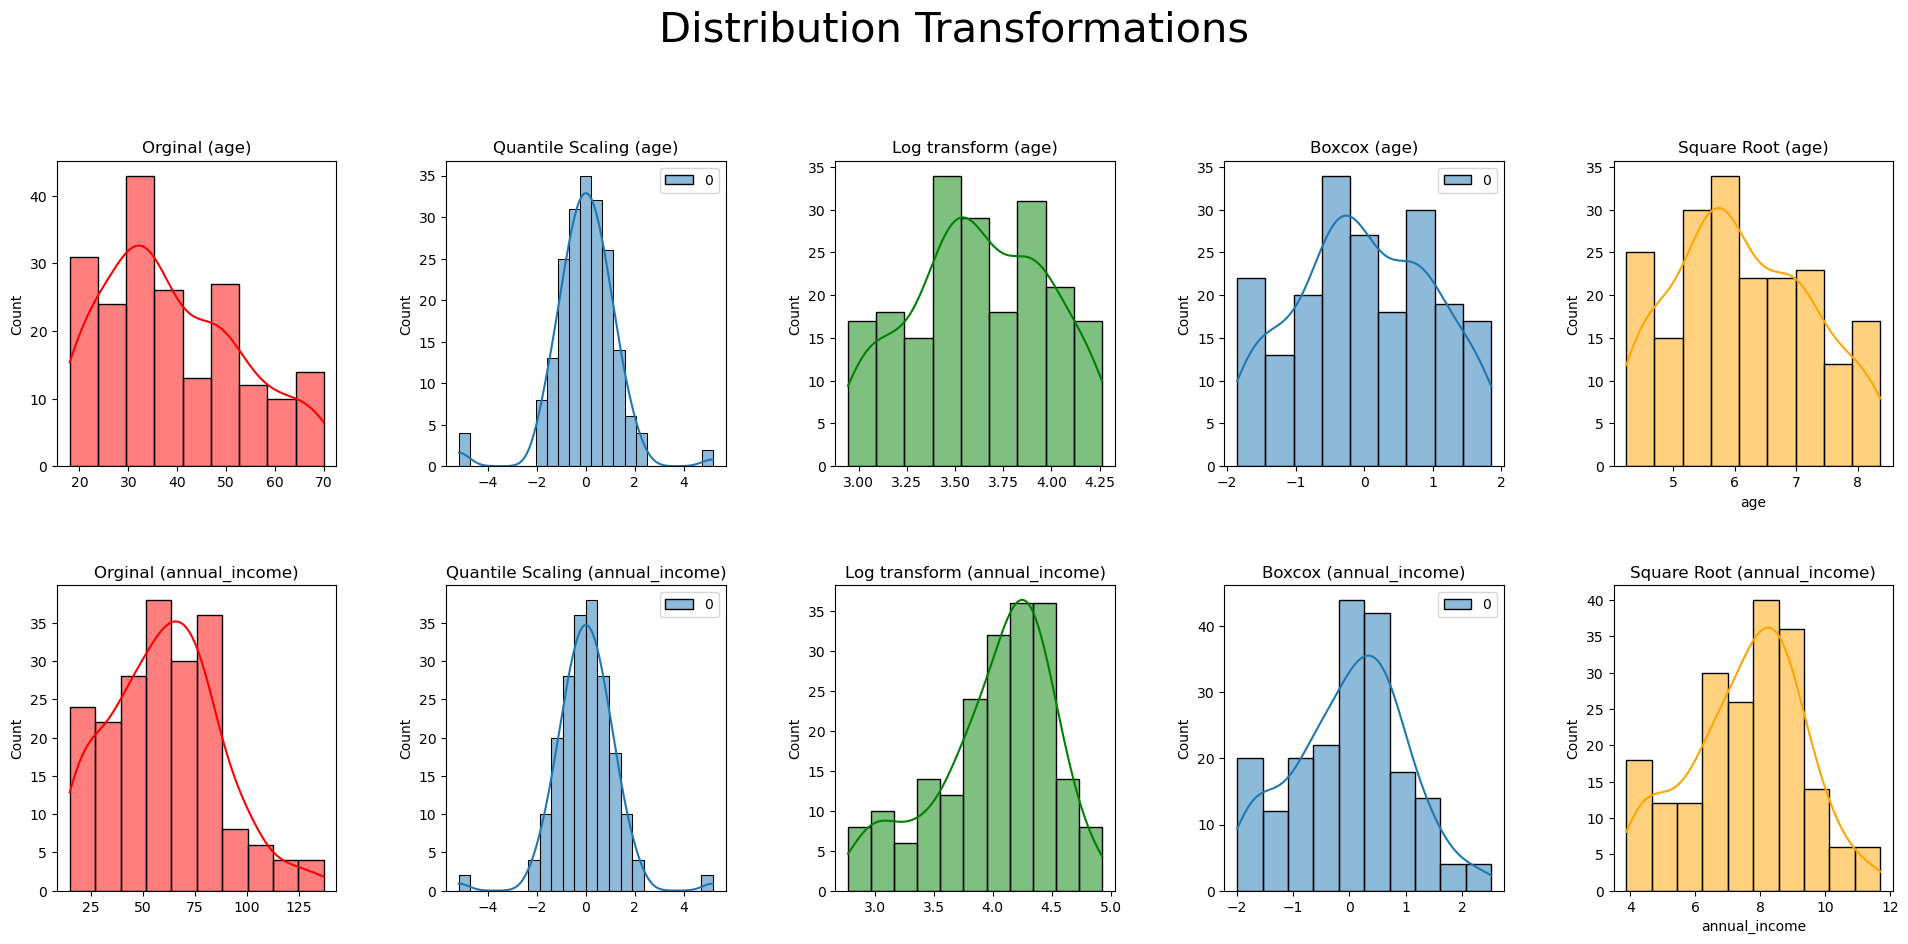

In [125]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

fig,axes = plt.subplots(ncols=5, nrows=2, figsize = (20,10))

non_dist_cols = ['age', 'annual_income']
for index,column in enumerate(non_dist_cols):

    scaler1 = QuantileTransformer(output_distribution="normal")
    quant_df = scaler1.fit_transform(data[[column]])
    
    scaler2 = PowerTransformer(method='box-cox')
    boxcox_df = scaler2.fit_transform(data[[column]])

    sns.histplot(x= data[column], ax=axes[index,0], color ='r', kde=True)
    sns.histplot(quant_df, ax=axes[index,1], color='blue', kde=True)
    sns.histplot(np.log1p(data[column]), ax=axes[index,2], color='green', kde=True)
    sns.histplot(boxcox_df, ax=axes[index,3], kde=True)
    sns.histplot(np.sqrt(data[column]), ax=axes[index,4], color='orange', kde=True)
    

    axes[index,0].set_title(f"Orginal ({column})")
    axes[index,0].set(xlabel=None)
    axes[index,1].set_title(f"Quantile Scaling ({column})")
    axes[index,2].set_title(f"Log transform ({column})")
    axes[index,2].set(xlabel=None)
    axes[index,3].set_title(f"Boxcox ({column})")
    axes[index,4].set_title(f"Square Root ({column})")

plt.suptitle("Distribution Transformations",fontsize = 30)
plt.tight_layout(pad = 4)
plt.show()